 # TripFare Predicting Urban Taxi Fare with Machine Learning

In [336]:
# loading data set 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [6]:
data=pd.read_csv( r"C:\Users\Admin\Documents\New Class Data science\project03\taxi_fare.csv")

In [7]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [11]:
data.shape

(212345, 18)

In [13]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [15]:
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [17]:
data.duplicated().sum()


0

In [18]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [19]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [21]:
# convert the date and time of the required columns ok
data["tpep_pickup_datetime"]=pd.to_datetime(data["tpep_pickup_datetime"])
data["tpep_dropoff_datetime"]=pd.to_datetime(data["tpep_dropoff_datetime"])

In [24]:
data["tpep_pickup_datetime"].head(10)

0   2016-03-01 00:00:00
1   2016-03-01 00:00:00
2   2016-03-01 00:00:00
3   2016-03-01 00:00:00
4   2016-03-01 00:00:00
5   2016-03-01 00:00:00
6   2016-03-01 00:00:00
7   2016-03-01 00:00:01
8   2016-03-01 00:00:01
9   2016-03-01 00:00:01
Name: tpep_pickup_datetime, dtype: datetime64[ns]

In [68]:
# creating the clonms for for hour day 

data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['tpep_pickup_datetime'].dt.dayofweek  
data['is_weekend'] = data['pickup_day'].isin([5, 6]).astype(int)
data['am_pm'] = data['pickup_hour'].apply(lambda x: 'am' if x < 12 else 'pm')
data['is_night'] = data['pickup_hour'].apply(lambda x: 1 if (x <= 5 or x >= 22) else 0)


In [71]:
for i in data:
    print(i)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
pickup_longitude
pickup_latitude
RatecodeID
store_and_fwd_flag
dropoff_longitude
dropoff_latitude
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
pickup_hour
pickup_day
is_weekend
am_pm
is_night


In [73]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour',
       'pickup_day', 'is_weekend', 'am_pm', 'is_night'],
      dtype='object')

In [91]:
data['pickup_day']


0         1
1         1
2         1
3         1
4         1
         ..
212340    1
212341    1
212342    1
212343    1
212344    1
Name: pickup_day, Length: 212345, dtype: int32

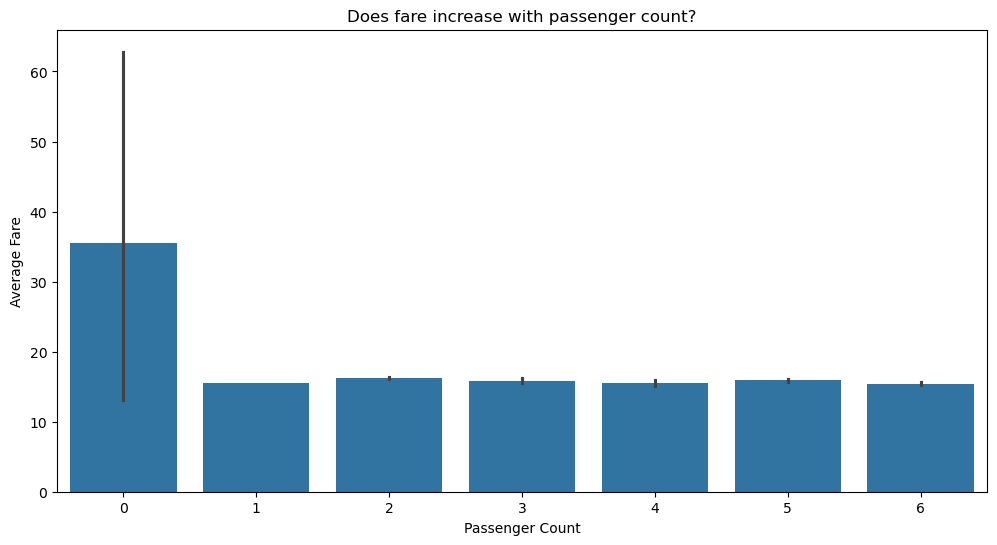

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='passenger_count', y='total_amount', data=data)
plt.title("Does fare increase with passenger count?")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare")
plt.show()

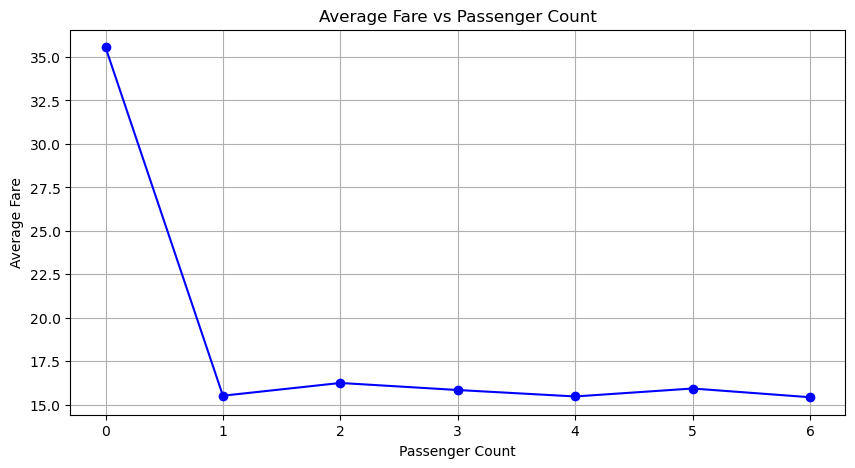

In [27]:
# Average Fare vs Passenger Count

avg_fare = data.groupby('passenger_count')['total_amount'].mean().reset_index()


plt.figure(figsize=(10, 5))
plt.plot(avg_fare['passenger_count'], avg_fare['total_amount'], marker='o', color='blue')
plt.title("Average Fare vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare")
plt.grid(True)
plt.show()

In [29]:
# Use regression models:

# Linear Regression

# Decision Tree

# Random Forest

# # XGBoost

data.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [30]:
for i in data:
    print(i)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
pickup_longitude
pickup_latitude
RatecodeID
store_and_fwd_flag
dropoff_longitude
dropoff_latitude
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount


In [31]:
data["VendorID"].unique()
    

array([1, 2], dtype=int64)

In [32]:
# VendorID
# tpep_pickup_datetime
# tpep_dropoff_datetime
# passenger_count
# pickup_longitude
# pickup_latitude
# RatecodeID
# store_and_fwd_flag
# dropoff_longitude
# dropoff_latitude
# payment_type
# fare_amount
# extra
# mta_tax
# tip_amount
# tolls_amount
# improvement_surcharge
# total_amount

In [42]:
data["VendorID"].unique()
data["improvement_surcharge"].unique()

array([ 0.3,  0. , -0.3])

<Axes: xlabel='passenger_count'>

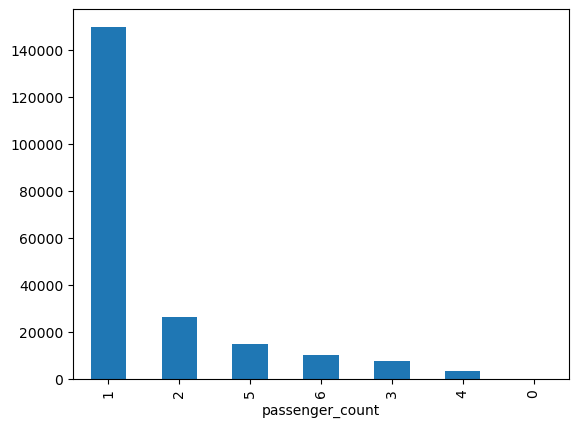

In [48]:
# Trip count by passenger_count

data['passenger_count'].value_counts().plot(kind='bar')

<Axes: xlabel='passenger_count', ylabel='total_amount'>

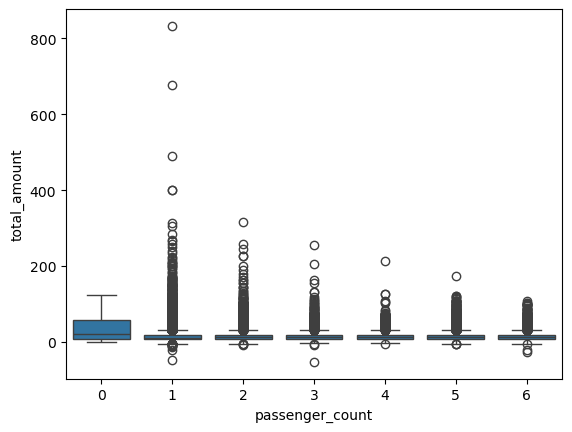

In [332]:
# Boxplot of fare by passengers

sns.boxplot(x='passenger_count', y='total_amount', data=data)

<Axes: xlabel='total_amount', ylabel='Count'>

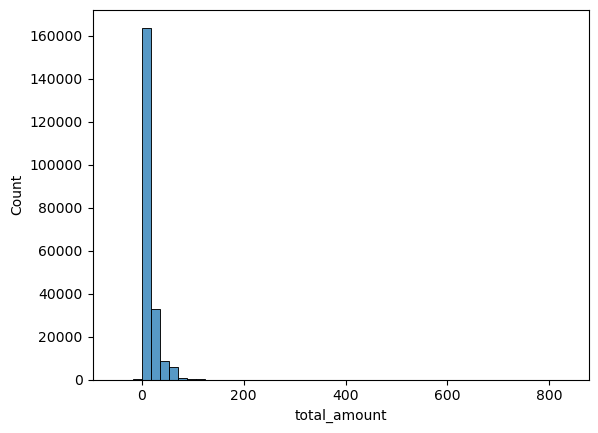

In [54]:
# Distribution of total_amount

sns.histplot(data['total_amount'], bins=50)

In [128]:
for i in data:
     print( i)


VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
pickup_longitude
pickup_latitude
RatecodeID
store_and_fwd_flag
dropoff_longitude
dropoff_latitude
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
pickup_hour
pickup_day
is_weekend
am_pm
is_night


In [140]:
# for trip duriation in minutes
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60  

In [138]:
data['trip_duration'].head()

0     7.916667
1    11.100000
2    31.100000
3     0.000000
4     0.000000
Name: trip_duration, dtype: float64

In [144]:
data.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour',
       'pickup_day', 'is_weekend', 'am_pm', 'is_night', 'trip_duration',
       'trip_distance'],
      dtype='object')

In [146]:
data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].isnull().sum()


pickup_latitude      0
pickup_longitude     0
dropoff_latitude     0
dropoff_longitude    0
dtype: int64

In [148]:
data['trip_distance'].describe()


count    212345.000000
mean         25.156607
std         435.567787
min           0.000000
25%           1.155181
50%           1.937586
75%           3.565562
max        8713.463111
Name: trip_distance, dtype: float64

# Haversine Formula

In [150]:
# Create Trip Distance Using Haversine Formula
 # Earth radius in kilometers is 6371
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371 
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c  # in km


In [152]:
# applying to the data set in data
data['trip_distance'] = data.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'],
                                                         row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


In [154]:
data.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour',
       'pickup_day', 'is_weekend', 'am_pm', 'is_night', 'trip_duration',
       'trip_distance'],
      dtype='object')

In [168]:
hermonson=data.head(8)

In [170]:
hermonson.to_excel('hermonson.xlsx', sheet_name='her', index=False)


In [179]:
# checking all created columns are their in data 
data.shape

(212345, 25)

In [185]:
data["is_night"].head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: is_night, dtype: int64

# UTC TO EDT TIME CHANGING

In [187]:
# Convert pickup_datetime and dropoff_datetime from UTC to EDT (UTC-4) that is 4hour difference 
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime']) - pd.Timedelta(hours=4)
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime']) - pd.Timedelta(hours=4)

# time-based columns again 
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['tpep_pickup_datetime'].dt.dayofweek
data['is_weekend'] = data['pickup_day'].isin([5, 6]).astype(int)
data['am_pm'] = data['pickup_hour'].apply(lambda x: 'am' if x < 12 else 'pm')
data['is_night'] = data['pickup_hour'].apply(lambda x: 1 if (x <= 5 or x >= 22) else 0)


In [189]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour',
       'pickup_day', 'is_weekend', 'am_pm', 'is_night', 'trip_duration',
       'trip_distance'],
      dtype='object')

In [197]:
data.shape

(212345, 25)

# encoding


In [202]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,is_weekend,am_pm,is_night,trip_duration,trip_distance
0,1,2016-02-29 20:00:00,2016-02-29 20:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.00,0.3,12.35,20,0,0,pm,0,7.916667,3.138096
1,1,2016-02-29 20:00:00,2016-02-29 20:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.00,0.3,15.35,20,0,0,pm,0,11.100000,4.303331
2,2,2016-02-29 20:00:00,2016-02-29 20:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.00,0.3,63.80,20,0,0,pm,0,31.100000,16.600142
3,2,2016-02-29 20:00:00,2016-02-29 20:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,5.54,0.3,41.62,20,0,0,pm,0,0.000000,9.046547
4,2,2016-02-29 20:00:00,2016-02-29 20:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,15.50,0.3,113.80,20,0,0,pm,0,0.000000,20.400022


# lable encoding

In [204]:
# Convert 'store_and_fwd_flag' from Y/N to 1/0 and 'am_pm' from 'am'/'pm' to 0/1
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

data['am_pm'] = data['am_pm'].map({'am': 0, 'pm': 1})


In [208]:
data["store_and_fwd_flag"].head(12)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
Name: store_and_fwd_flag, dtype: int64

In [210]:
data["am_pm"].head(12)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: am_pm, dtype: int64

In [236]:
data.shape

(212345, 25)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               212345 non-null  int64         
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns]
 3   passenger_count        212345 non-null  int64         
 4   pickup_longitude       212345 non-null  float64       
 5   pickup_latitude        212345 non-null  float64       
 6   RatecodeID             212345 non-null  int64         
 7   store_and_fwd_flag     212345 non-null  int64         
 8   dropoff_longitude      212345 non-null  float64       
 9   dropoff_latitude       212345 non-null  float64       
 10  payment_type           212345 non-null  int64         
 11  fare_amount            212345 non-null  float64       
 12  extra                  212345 non-null  floa

In [238]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,is_weekend,am_pm,is_night,trip_duration,trip_distance
0,1,2016-02-29 20:00:00,2016-02-29 20:07:55,1,-73.976746,40.765152,1,0,-74.004265,40.746128,...,0.00,0.3,12.35,20,0,0,1,0,7.916667,3.138096
1,1,2016-02-29 20:00:00,2016-02-29 20:11:06,1,-73.983482,40.767925,1,0,-74.005943,40.733166,...,0.00,0.3,15.35,20,0,0,1,0,11.100000,4.303331
2,2,2016-02-29 20:00:00,2016-02-29 20:31:06,2,-73.782021,40.644810,1,0,-73.974541,40.675770,...,0.00,0.3,63.80,20,0,0,1,0,31.100000,16.600142
3,2,2016-02-29 20:00:00,2016-02-29 20:00:00,3,-73.863419,40.769814,1,0,-73.969650,40.757767,...,5.54,0.3,41.62,20,0,0,1,0,0.000000,9.046547
4,2,2016-02-29 20:00:00,2016-02-29 20:00:00,5,-73.971741,40.792183,3,0,-74.177170,40.695053,...,15.50,0.3,113.80,20,0,0,1,0,0.000000,20.400022


In [215]:
data.dropna(inplace=True)

In [217]:
data.reset_index(drop=True, inplace=True)

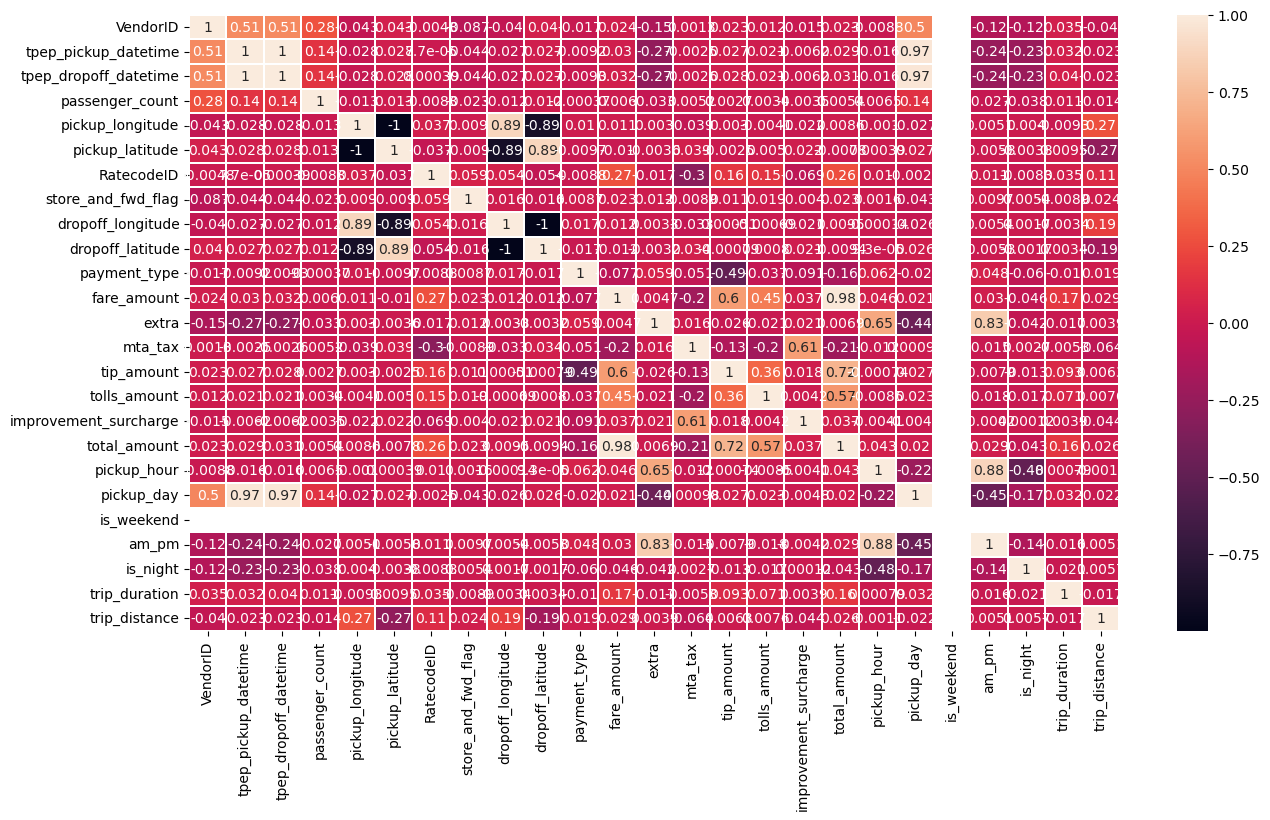

In [257]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True, linewidths=0.2)
plt.show()

In [267]:
print(data["is_weekend"].head())
print(data["is_weekend"].unique())

0    0
1    0
2    0
3    0
4    0
Name: is_weekend, dtype: int32
[0]


In [291]:
data["total_amount"].shape

(212345,)

In [338]:
# analysing corrilation of total mount with others column
target_corr = data.corr()["total_amount"].abs().sort_values(ascending=False)[1:]
print(target_corr)


fare_amount              0.977607
tip_amount               0.718677
tolls_amount             0.574114
RatecodeID               0.264924
mta_tax                  0.211563
trip_duration            0.160012
payment_type             0.157255
pickup_hour              0.042612
is_night                 0.042501
improvement_surcharge    0.036718
tpep_dropoff_datetime    0.030803
tpep_pickup_datetime     0.029406
am_pm                    0.028676
trip_distance            0.025692
VendorID                 0.023449
store_and_fwd_flag       0.023028
pickup_day               0.020122
dropoff_longitude        0.009462
dropoff_latitude         0.009437
pickup_longitude         0.008604
pickup_latitude          0.007806
extra                    0.006900
passenger_count          0.005430
is_weekend                    NaN
Name: total_amount, dtype: float64


In [309]:
data["total_amount"].value_counts()

total_amount
7.30      5167
6.80      5076
7.80      4941
8.30      4931
6.30      4712
          ... 
97.88        1
12.93        1
105.84       1
65.32        1
65.79        1
Name: count, Length: 2727, dtype: int64

# Model Building 
# LinearRegression Model

In [373]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour',
       'pickup_day', 'is_weekend', 'am_pm', 'is_night', 'trip_duration',
       'trip_distance'],
      dtype='object')

In [375]:
data.shape

(212345, 25)

In [377]:
X = data.drop(['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
y = data['total_amount']


In [399]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [401]:
# model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [403]:
y_pred = model.predict(X_test)
y_pred

array([10.56001338,  4.79989242, 10.80001997, ...,  8.79995718,
        7.82003151, 12.80002644])

In [411]:
r2_lr = r2_score(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred)


print("Linear Regression Results:")
print("R² Score      :", r2_lr)
print("MSE           :", mse_lr)
print("RMSE          :", rmse_lr)
print("MAE           :", mae_lr)

Linear Regression Results:
R² Score      : 0.9999999999038381
MSE           : 1.867666442801494e-08
RMSE          : 0.00013666259337512566
MAE           : 5.073216726309757e-05


# 2.Ridge Regression

In [414]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression:")
print("R²:", r2_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)


Ridge Regression:
R²: 0.9999999978112709
MSE: 4.250973574555452e-07
RMSE: 0.0006519949060042917
MAE: 0.00012307553218918944


# 3.Lasso Regression

In [417]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression:")
print("R²:", r2_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("MAE:", mae_lasso)

Lasso Regression:
R²: 0.9999029855027756
MSE: 0.0188422619601691
RMSE: 0.1372671190058606
MAE: 0.07765890914780595


# 4. Random Forest Regressor

In [420]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("R²:", r2_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)


Random Forest Regressor:
R²: 0.9791094319284637
MSE: 4.057389022901886
RMSE: 2.014296160672975
MAE: 0.03902248896021086


# 5. Gradient Boosting Regressor

In [363]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Regressor:")
print("R²:", r2_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("MAE:", mae_gb)

Gradient Boosting Regressor:
R²: 0.9810425282094998
MSE: 3.681940944897007
RMSE: 1.9188384363716
MAE: 0.18970264428544317


In [439]:
results_df = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Random Forest", "Gradient Boosting"],
    "R²": [r2, r2_ridge, r2_lasso, r2_rf, r2_gb],
    "MSE": [mse_lr, mse_ridge, mse_lasso, mse_rf, mse_gb],
    "RMSE": [rmse_lr, rmse_ridge, rmse_lasso, rmse_rf, rmse_gb],
    "MAE": [mae_lr, mae_ridge, mae_lasso, mae_rf, mae_gb]
})

results_df


,Model,R²,MSE,RMSE,MAE
0,Linear,1.000000,1.867666e-08,0.000137,0.000051
1,Ridge,1.000000,4.250974e-07,0.000652,0.000123
2,Lasso,0.999903,1.884226e-02,0.137267,0.077659
3,Random Forest,0.979109,4.057389e+00,2.014296,0.039022
4,Gradient Boosting,0.981043,3.681941e+00,1.918838,0.189703


In [453]:
# now choosing the LinearRegression_model to save the model by pickel 

import pickle

with open('LinearRegression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [457]:
# to open

with open('LinearRegression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# predicting
y_pred = loaded_model.predict(X_test)
print(y_pred)

[10.56001338  4.79989242 10.80001997 ...  8.79995718  7.82003151
 12.80002644]


In [462]:
import pickle

with open('LinearRegression_model.pkl', 'rb') as file:
    model = pickle.load(file)

print(model.feature_names_in_)


['VendorID' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'RatecodeID' 'store_and_fwd_flag' 'dropoff_longitude' 'dropoff_latitude'
 'payment_type' 'fare_amount' 'extra' 'mta_tax' 'tip_amount'
 'tolls_amount' 'improvement_surcharge' 'pickup_hour' 'pickup_day'
 'is_weekend' 'am_pm' 'is_night' 'trip_duration' 'trip_distance']


# stremlit code

In [472]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from datetime import datetime

st.title("TripFare Prediction App")
st.markdown("Predict total taxi fare based on trip details using the Linear Regression model.")

try:
    with open("LinearRegression_model.pkl", "rb") as file:
        model = pickle.load(file)
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()

VendorID = st.selectbox("Vendor ID", [1, 2])
passenger_count = st.number_input("Passenger Count", min_value=1, max_value=10, value=1)
pickup_date = st.date_input("Pickup Date")
pickup_time = st.time_input("Pickup Time")
dropoff_date = st.date_input("Dropoff Date")
dropoff_time = st.time_input("Dropoff Time")

pickup_datetime = datetime.combine(pickup_date, pickup_time)
dropoff_datetime = datetime.combine(dropoff_date, dropoff_time)

pickup_longitude = st.number_input("Pickup Longitude", value=-73.985428)
pickup_latitude = st.number_input("Pickup Latitude", value=40.748817)
dropoff_longitude = st.number_input("Dropoff Longitude", value=-73.985428)
dropoff_latitude = st.number_input("Dropoff Latitude", value=40.748817)

RatecodeID = st.selectbox("Ratecode ID", [1, 2, 3, 4, 5, 6])

store_and_fwd_flag_str = st.selectbox("Store and Forward Flag", ['N', 'Y'])
store_and_fwd_flag = 0 if store_and_fwd_flag_str == 'N' else 1

payment_type = st.selectbox("Payment Type", [1, 2, 3, 4, 5, 6])

fare_amount = st.number_input("Fare Amount (Rs)", value=10.0)
extra = st.number_input("Extra Charges (Rs)", value=0.5)
mta_tax = st.number_input("MTA Tax (Rs)", value=0.5)
tip_amount = st.number_input("Tip Amount (Rs)", value=2.0)
tolls_amount = st.number_input("Tolls Amount (Rs)", value=0.0)
improvement_surcharge = st.number_input("Improvement Surcharge (Rs)", value=0.3)

pickup_hour = pickup_datetime.hour
pickup_day = pickup_datetime.weekday()
is_night = int(pickup_hour >= 20 or pickup_hour < 5)
am_pm = int(pickup_hour >= 12)
is_weekend = int(pickup_day in [5, 6])

trip_duration = (dropoff_datetime - pickup_datetime).total_seconds() / 60  # duration in minutes
trip_distance = np.sqrt(
    (dropoff_longitude - pickup_longitude)**2 +
    (dropoff_latitude - pickup_latitude)**2
) * 69  # Approx miles, rough estimate

input_data = pd.DataFrame([{
    'VendorID': VendorID,
    'passenger_count': passenger_count,
    'pickup_longitude': pickup_longitude,
    'pickup_latitude': pickup_latitude,
    'RatecodeID': RatecodeID,
    'store_and_fwd_flag': store_and_fwd_flag,
    'dropoff_longitude': dropoff_longitude,
    'dropoff_latitude': dropoff_latitude,
    'payment_type': payment_type,
    'fare_amount': fare_amount,
    'extra': extra,
    'mta_tax': mta_tax,
    'tip_amount': tip_amount,
    'tolls_amount': tolls_amount,
    'improvement_surcharge': improvement_surcharge,
    'pickup_hour': pickup_hour,
    'pickup_day': pickup_day,
    'is_weekend': is_weekend,
    'am_pm': am_pm,
    'is_night': is_night,
    'trip_duration': trip_duration,
    'trip_distance': trip_distance
}])

if st.button("Predict Total Fare"):
    try:
        prediction = model.predict(input_data)[0]
        st.success(f"Predicted Total Fare: Rs{prediction:.2f}")
    except Exception as e:
        st.error(f"Prediction error: {e}")
